## カーネル密度推定によるノンパラメトリックな確率密度の推定

In [75]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import matplotlib.pyplot as plt
import statsmodels.datasets as ds
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [76]:
data_frame = pd.read_csv("./Allstorms.ibtracs_wmo.v03r05.csv")
data_frame.tail()

,Serial_Num,Season,Num,Basin,Sub_basin,Name,ISO_time,Nature,Latitude,Longitude,Wind(WMO),Pres(WMO),Center,Wind(WMO) Percentile,Pres(WMO) Percentile,Track_type
186049,2013116S09153,2013,4,SP,EA,ZANE,2013-05-01 06:00:00,NR,-13.5,146.5,50,992,bom,59.876,45.768,main
186050,2013116S09153,2013,4,SP,EA,ZANE,2013-05-01 09:00:00,NR,-13.4,146.0,45,996,bom,52.185,32.363,main
186051,2013116S09153,2013,4,SP,EA,ZANE,2013-05-01 12:00:00,NR,-13.2,145.5,45,993,bom,52.185,44.144,main
186052,2013116S09153,2013,4,SP,EA,ZANE,2013-05-01 15:00:00,NR,-13.1,145.2,35,999,bom,31.836,22.241,main
186053,2013116S09153,2013,4,SP,EA,ZANE,2013-05-01 17:00:00,NR,-12.9,144.8,30,1001,bom,23.039,13.648,main


In [77]:
grp_by_id = data_frame.groupby("Serial_Num")
pos = grp_by_id[['Longitude', 'Latitude']].mean()
pos.head()

,Longitude,Latitude
Serial_Num,,
1848011S09080,71.854545,-15.918182
1848011S15057,52.016667,-24.116667
1848061S12075,65.342857,-20.528571
1851080S15063,55.400000,-17.325000
1851080S21060,60.200000,-23.633333


世界地図を表示
Basemap(表示方法，緯度下限，緯度上限，経度下限，経度上限)

<bound method Basemap.plot of <mpl_toolkits.basemap.Basemap object at 0x7fe02020dc18>>

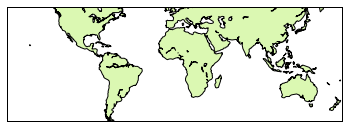

In [78]:
map_data = Basemap(projection="mill", llcrnrlat=-55, urcrnrlat=55, llcrnrlon=-180, urcrnrlon=180)
x0, y0 = map_data(-180, -85)
x1, y1 = map_data(180, 85)
map_data.drawcoastlines()
map_data.fillcontinents(color="#dbf8b2")
map_data.plot

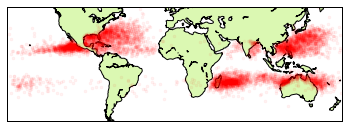

In [79]:
x, y = pos.values.T
x_map, y_map = map_data(x, y)
map_data.drawcoastlines()
map_data.fillcontinents(color="#dbf8b2")
map_data.plot(x_map, y_map, '.r', alpha=0.05)

Kernel密度関数を返す処理を実行する．
Kernel密度関数を推定する処理は
$$\hat{f}_h(x) = \frac{1}{nh}\sum_{i=1}^nK(\frac{x - x_i}{h})$$
で与えられ，$K(x)$がKernel関数と呼ばれる．Gauss関数etc.
ここではGauss関数を用いることにする

In [80]:
h = np.vstack((x_map, y_map))
kde = stats.gaussian_kde

マップの格子データを生成する

In [81]:
k = 50
tx, ty = np.meshgrid(np.linspace(x0, x1, k), np.linspace(y0, y1,2*k))

In [82]:
v = kde(h)(np.vstack((tx.ravel(), ty.ravel()))).reshape((2*k, k))

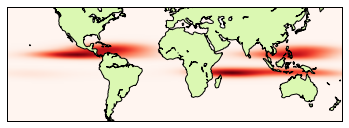

In [83]:
map_data.drawcoastlines()
map_data.fillcontinents(color="#dbf8b2")
map_data.imshow(v, origin="lower", extent=[x0, x1, y0, y1], cmap=plt.get_cmap("Reds"))

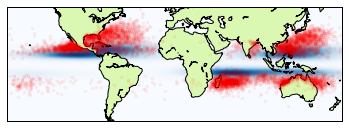

In [84]:
map_data.drawcoastlines()
map_data.fillcontinents(color="#dbf8b2")
map_data.plot(x_map, y_map, '.r', alpha=0.05)
map_data.imshow(v, origin="lower", cmap=plt.get_cmap("Blues"))